Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/ping_pong/'

NMSG = 100_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 12:12:46 2025 +0100) (508.63ms ela...,2.75,0.0000,0.696,5.22,0.57,44.33,62.92 C,Nominal
1,(Fri Mar 14 12:12:47 2025 +0100) (507.77ms ela...,7.00,0.1110,0.949,9.43,0.93,44.57,62.92 C,Nominal
2,(Fri Mar 14 12:12:47 2025 +0100) (508.82ms ela...,10.60,0.1330,1.120,13.31,1.19,73.62,62.73 C,Nominal
3,(Fri Mar 14 12:12:48 2025 +0100) (507.67ms ela...,4.35,0.0632,0.856,6.82,0.82,45.50,62.73 C,Nominal
4,(Fri Mar 14 12:12:48 2025 +0100) (508.33ms ela...,6.10,2.5500,1.620,11.46,1.40,76.56,62.28 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(2274, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 12:12:58 2025 +0100) (1006.31ms el...,35.6,0.0887,1.310,38.33,3.87,98.04,65.98 C,Nominal
1,(Fri Mar 14 12:12:59 2025 +0100) (1005.88ms el...,34.3,0.0214,0.766,36.81,3.81,99.12,69.97 C,Nominal
2,(Fri Mar 14 12:13:00 2025 +0100) (1004.88ms el...,34.5,0.0296,0.861,37.01,3.86,97.98,73.12 C,Nominal
3,(Fri Mar 14 12:13:01 2025 +0100) (1004.37ms el...,34.6,0.0000,0.617,36.95,3.83,99.44,75.77 C,Nominal
4,(Fri Mar 14 12:13:02 2025 +0100) (1003.88ms el...,35.0,0.0000,0.718,37.41,3.80,98.77,78.34 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 13:02:42 2025 +0100) (509.61ms ela...,6.280,0.0614,0.942,8.74,0.86,45.11,52.48 C,Nominal
1,(Fri Mar 14 13:02:42 2025 +0100) (505.82ms ela...,8.370,0.0557,0.914,10.82,1.00,62.82,52.95 C,Nominal
2,(Fri Mar 14 13:02:43 2025 +0100) (505.71ms ela...,7.010,0.1000,1.050,9.72,1.09,57.74,52.95 C,Nominal
3,(Fri Mar 14 13:02:43 2025 +0100) (508.48ms ela...,0.702,0.0513,0.740,3.07,0.47,29.60,52.78 C,Nominal
4,(Fri Mar 14 13:02:44 2025 +0100) (507.95ms ela...,0.216,0.0000,0.533,2.25,0.15,10.11,52.78 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(1118, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 13:02:53 2025 +0100) (1007.39ms el...,17.3,0.0686,0.882,19.83,1.61,96.77,56.73 C,Nominal
1,(Fri Mar 14 13:02:54 2025 +0100) (1006.38ms el...,17.8,0.0283,0.819,20.70,1.70,97.33,60.04 C,Nominal
2,(Fri Mar 14 13:02:55 2025 +0100) (1004.79ms el...,19.6,0.0238,0.733,23.08,1.88,96.53,64.52 C,Nominal
3,(Fri Mar 14 13:02:56 2025 +0100) (1004.37ms el...,14.5,0.0000,0.574,17.31,1.24,98.24,66.72 C,Nominal
4,(Fri Mar 14 13:02:57 2025 +0100) (1006.88ms el...,19.2,0.0000,0.841,21.93,1.75,98.43,68.95 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 12:12:46,2.75,0.0000,0.696,5.22,0.57,44.33,62.92,Nominal,508.63
1,2025-03-14 12:12:47,7.00,0.1110,0.949,9.43,0.93,44.57,62.92,Nominal,507.77
2,2025-03-14 12:12:47,10.60,0.1330,1.120,13.31,1.19,73.62,62.73,Nominal,508.82
3,2025-03-14 12:12:48,4.35,0.0632,0.856,6.82,0.82,45.50,62.73,Nominal,507.67
4,2025-03-14 12:12:48,6.10,2.5500,1.620,11.46,1.40,76.56,62.28,Nominal,508.33


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(2274, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 12:12:58,35.6,0.0887,1.310,38.33,3.87,98.04,65.98,Nominal,1006.31
1,2025-03-14 12:12:59,34.3,0.0214,0.766,36.81,3.81,99.12,69.97,Nominal,1005.88
2,2025-03-14 12:13:00,34.5,0.0296,0.861,37.01,3.86,97.98,73.12,Nominal,1004.88
3,2025-03-14 12:13:01,34.6,0.0000,0.617,36.95,3.83,99.44,75.77,Nominal,1004.37
4,2025-03-14 12:13:02,35.0,0.0000,0.718,37.41,3.80,98.77,78.34,Nominal,1003.88


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 13:02:42,6.280,0.0614,0.942,8.74,0.86,45.11,52.48,Nominal,509.61
1,2025-03-14 13:02:42,8.370,0.0557,0.914,10.82,1.00,62.82,52.95,Nominal,505.82
2,2025-03-14 13:02:43,7.010,0.1000,1.050,9.72,1.09,57.74,52.95,Nominal,505.71
3,2025-03-14 13:02:43,0.702,0.0513,0.740,3.07,0.47,29.60,52.78,Nominal,508.48
4,2025-03-14 13:02:44,0.216,0.0000,0.533,2.25,0.15,10.11,52.78,Nominal,507.95


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(1118, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 13:02:53,17.3,0.0686,0.882,19.83,1.61,96.77,56.73,Nominal,1007.39
1,2025-03-14 13:02:54,17.8,0.0283,0.819,20.70,1.70,97.33,60.04,Nominal,1006.38
2,2025-03-14 13:02:55,19.6,0.0238,0.733,23.08,1.88,96.53,64.52,Nominal,1004.79
3,2025-03-14 13:02:56,14.5,0.0000,0.574,17.31,1.24,98.24,66.72,Nominal,1004.37
4,2025-03-14 13:02:57,19.2,0.0000,0.841,21.93,1.75,98.43,68.95,Nominal,1006.88


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


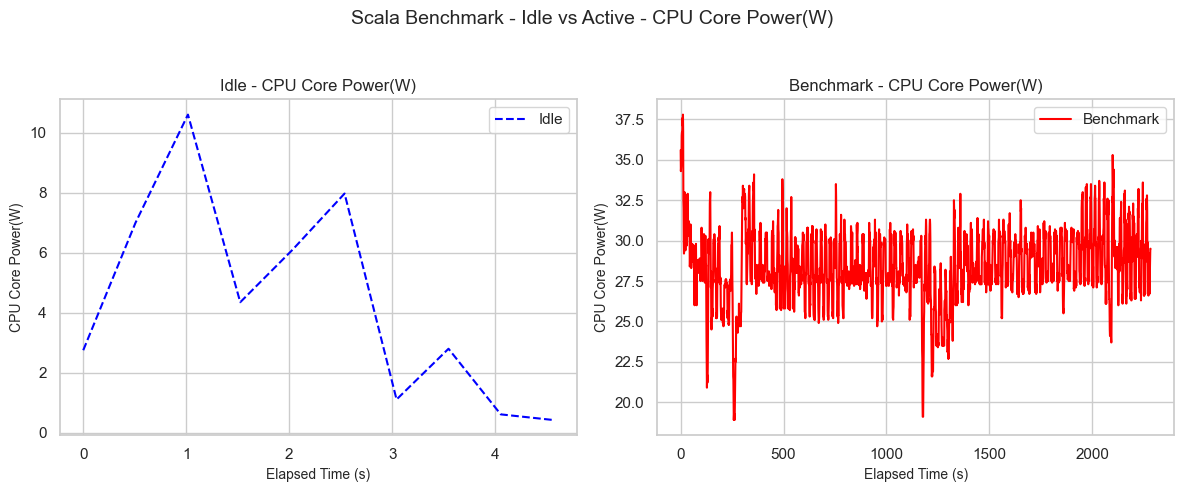

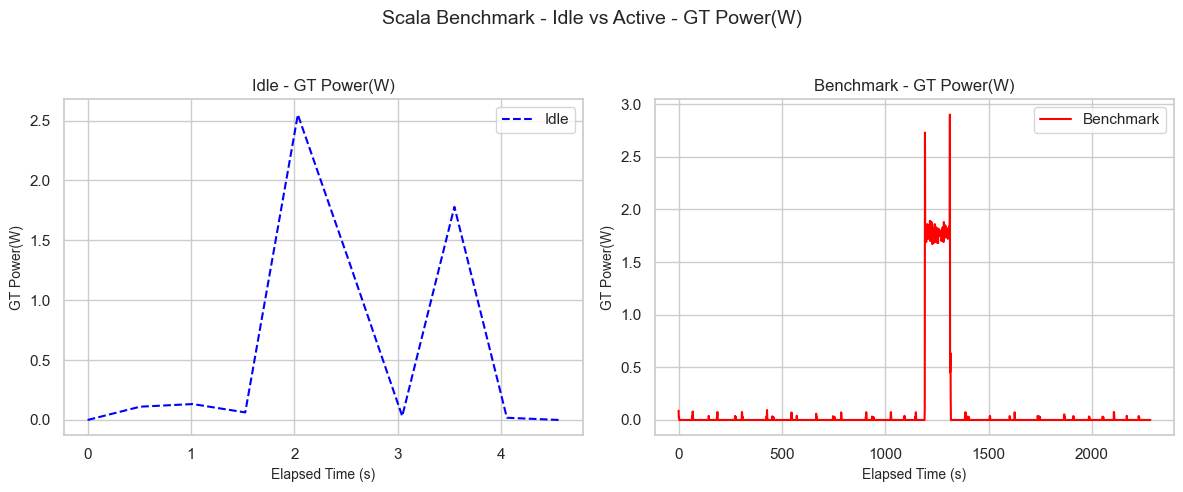

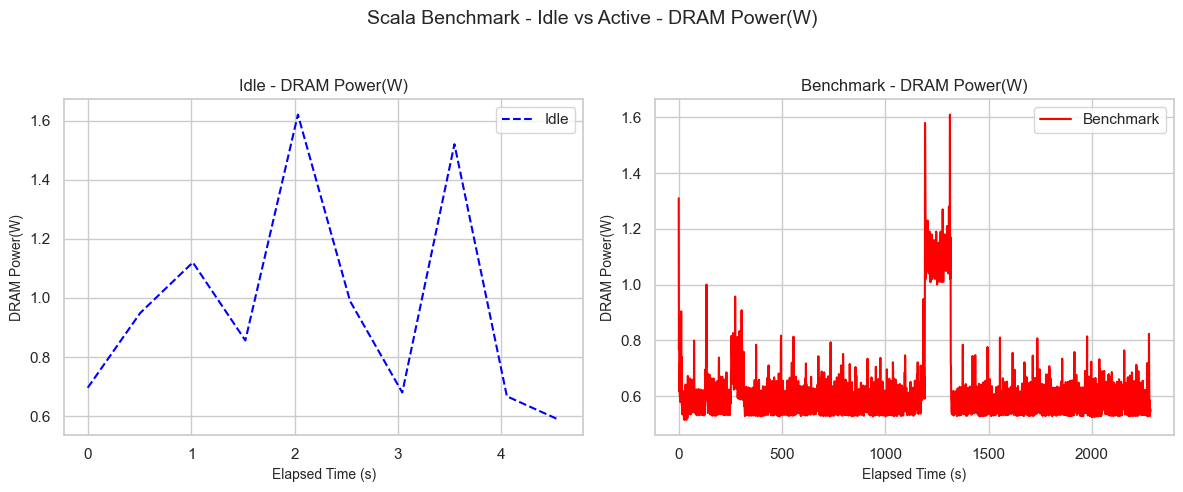

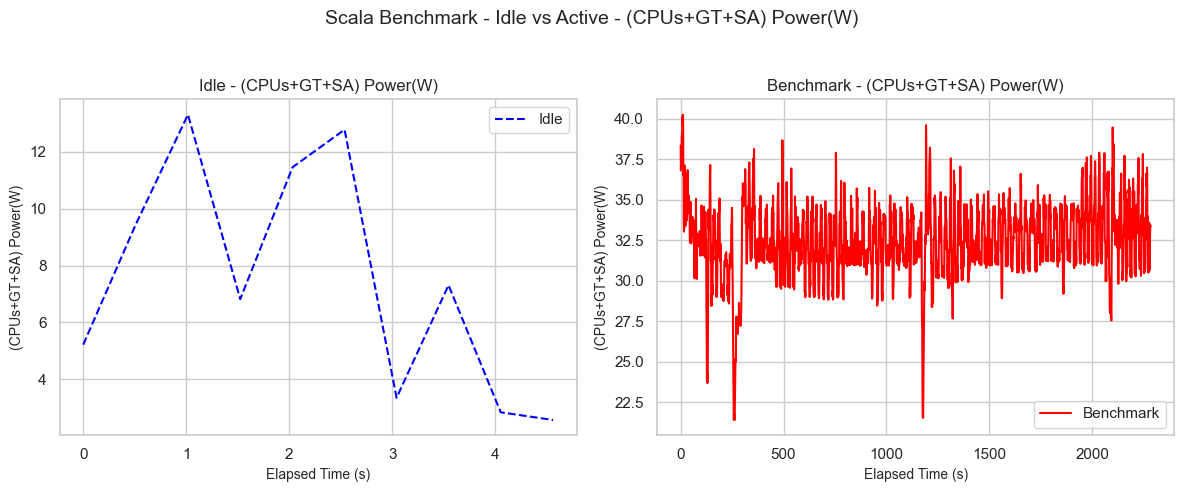

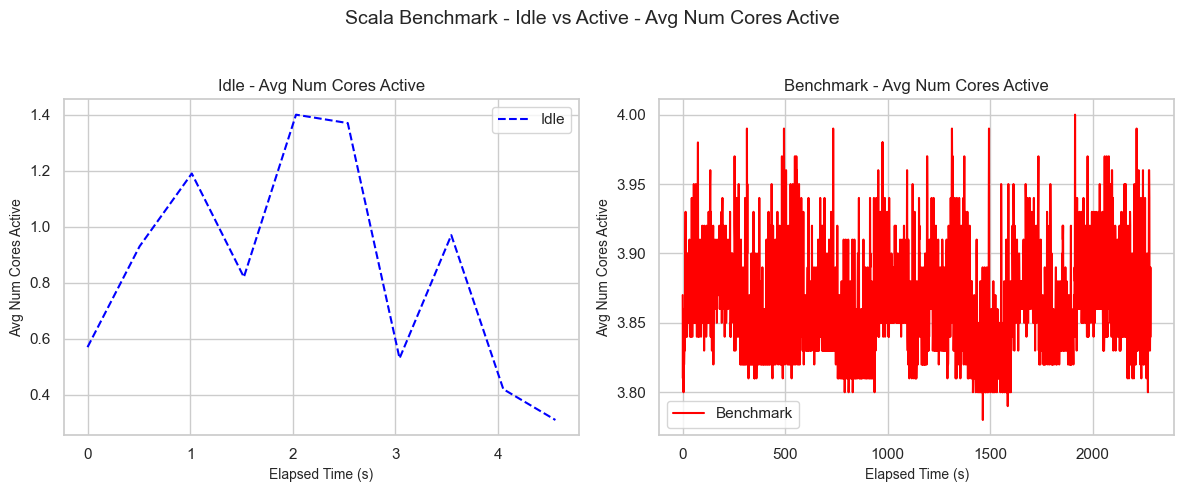

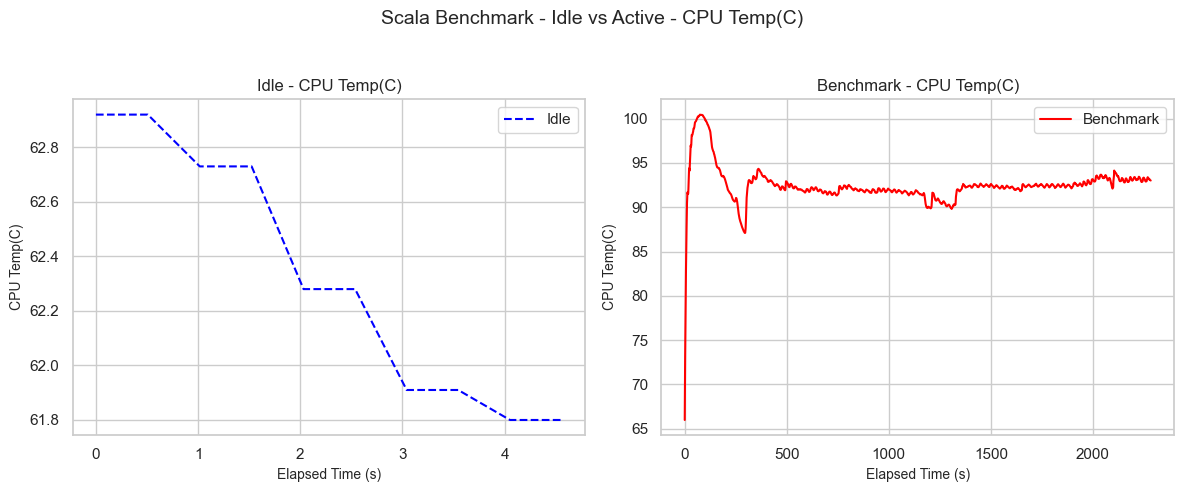

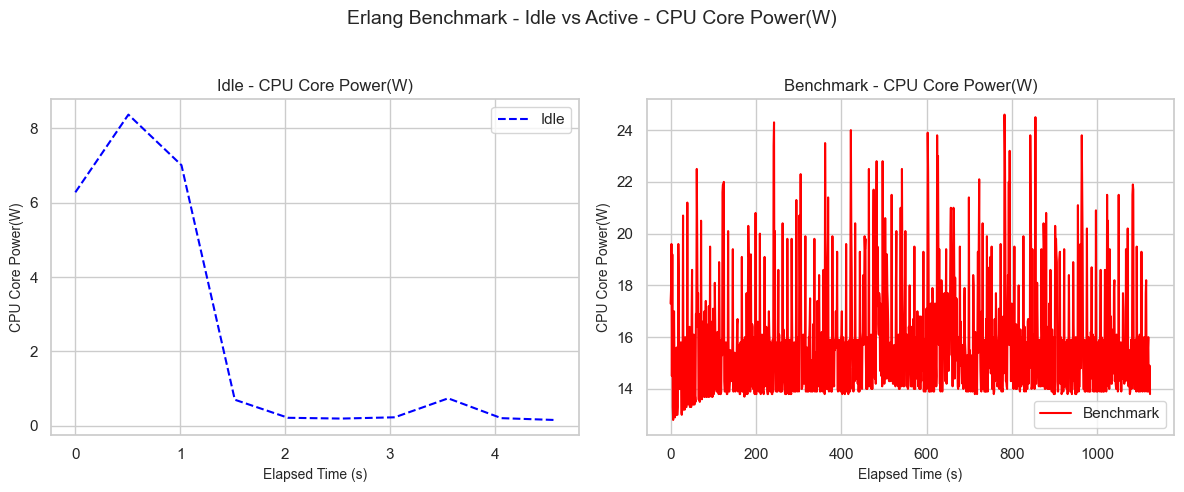

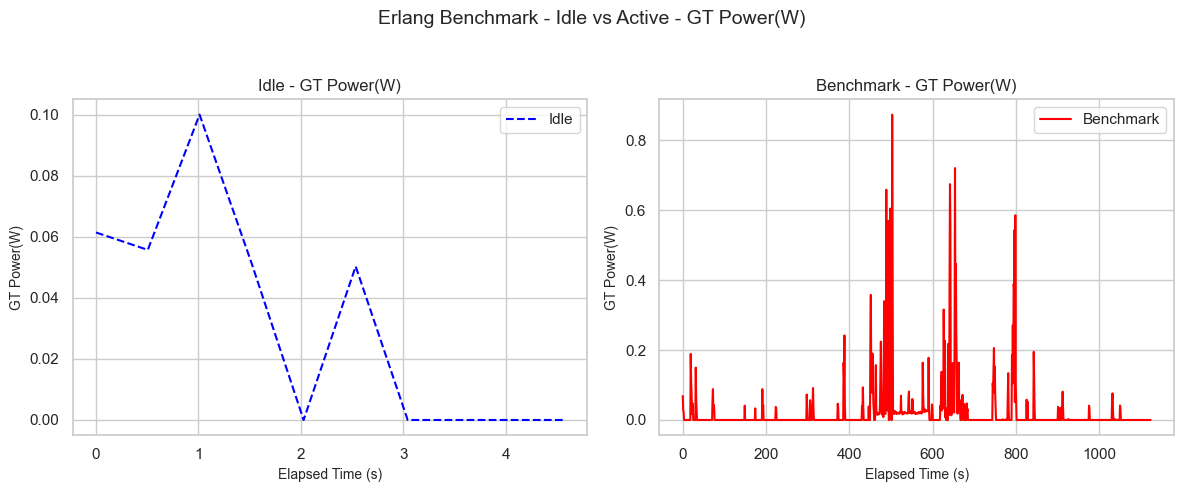

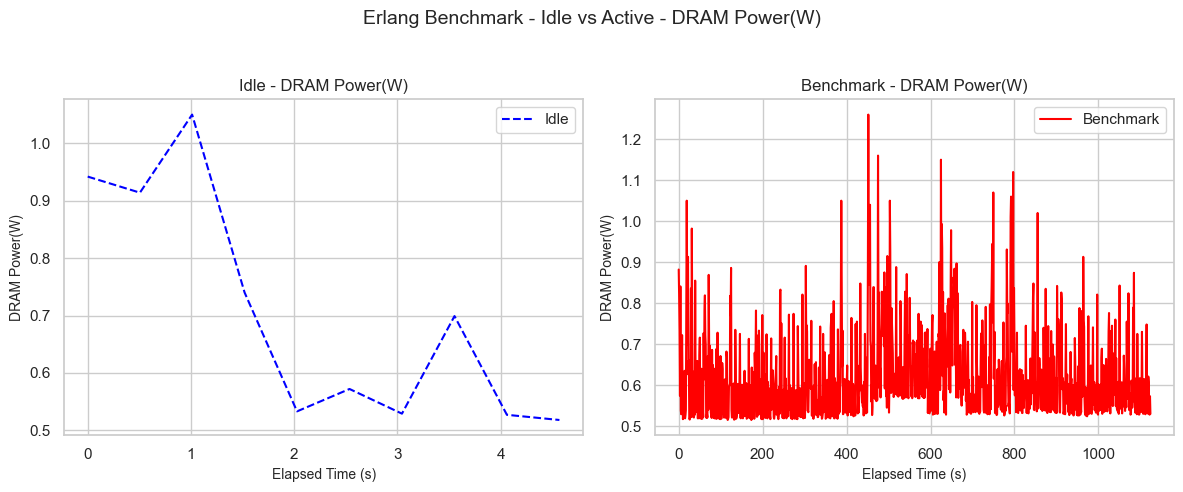

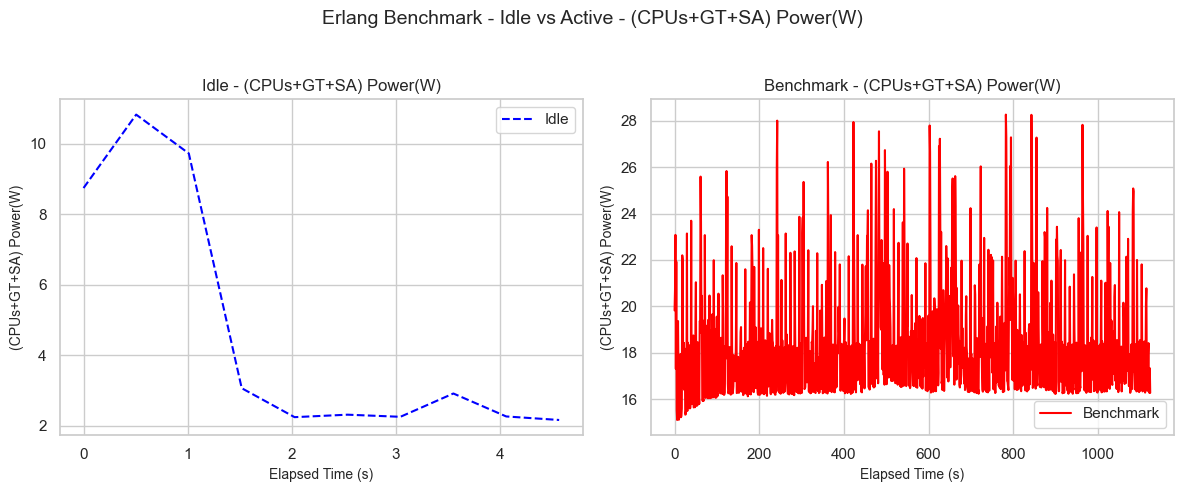

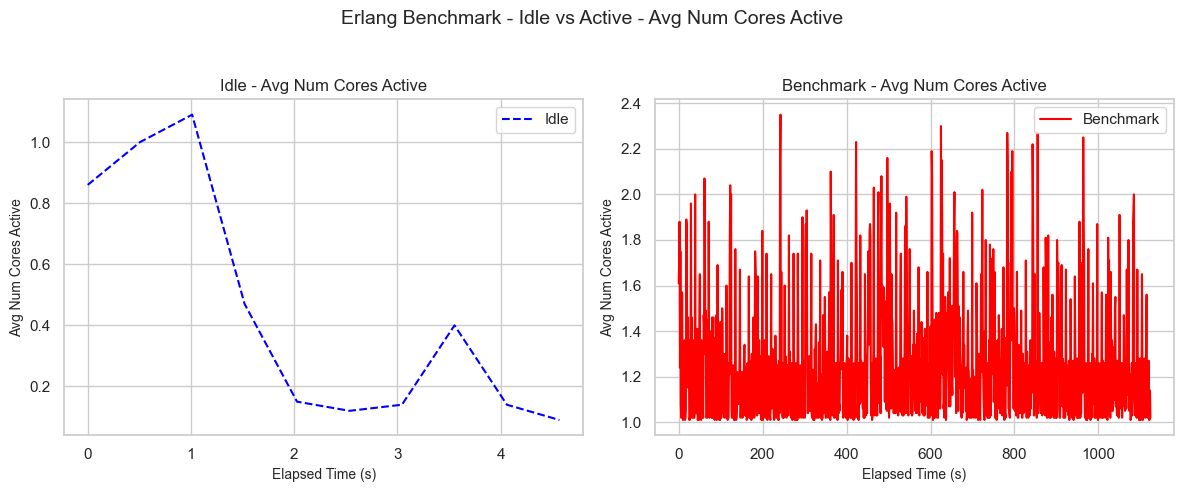

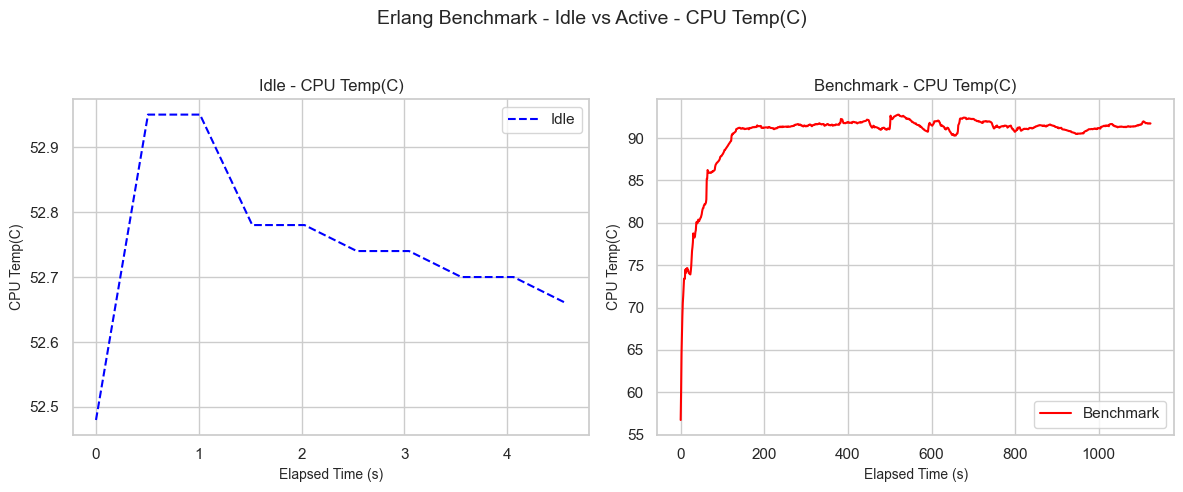

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

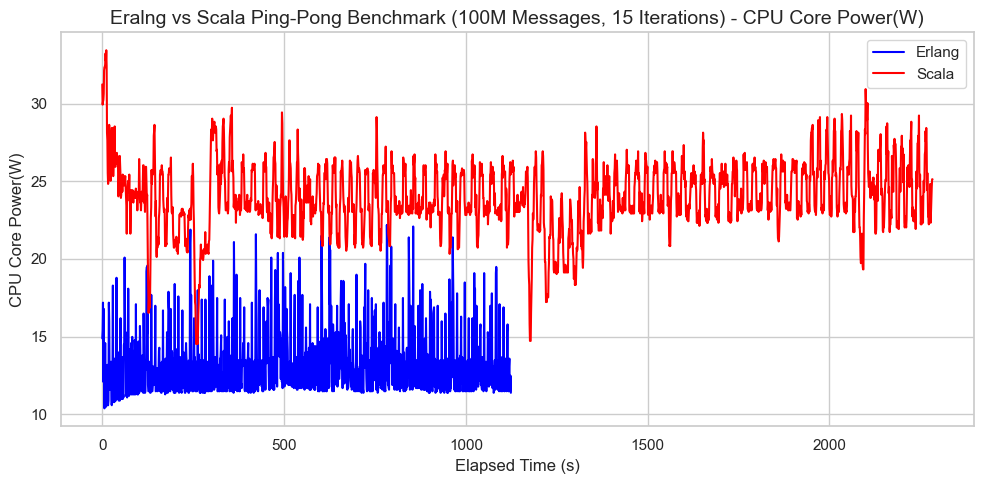

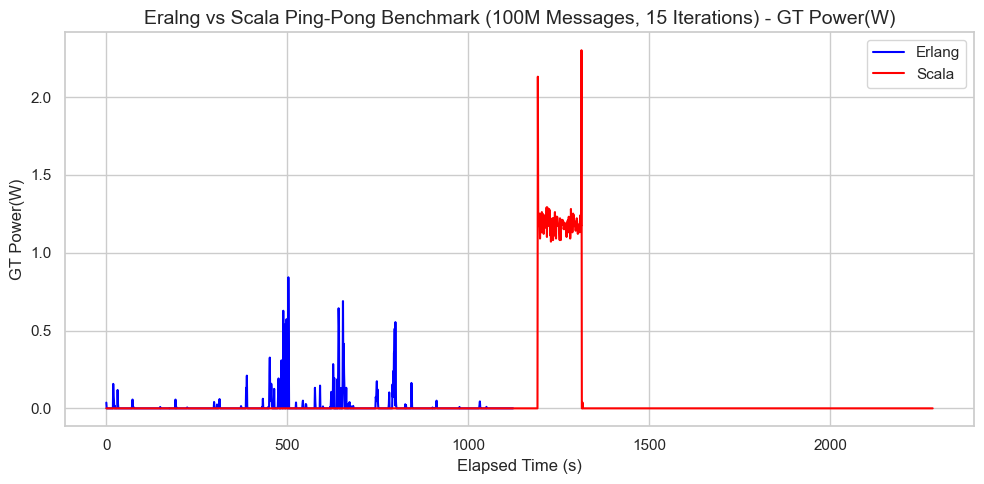

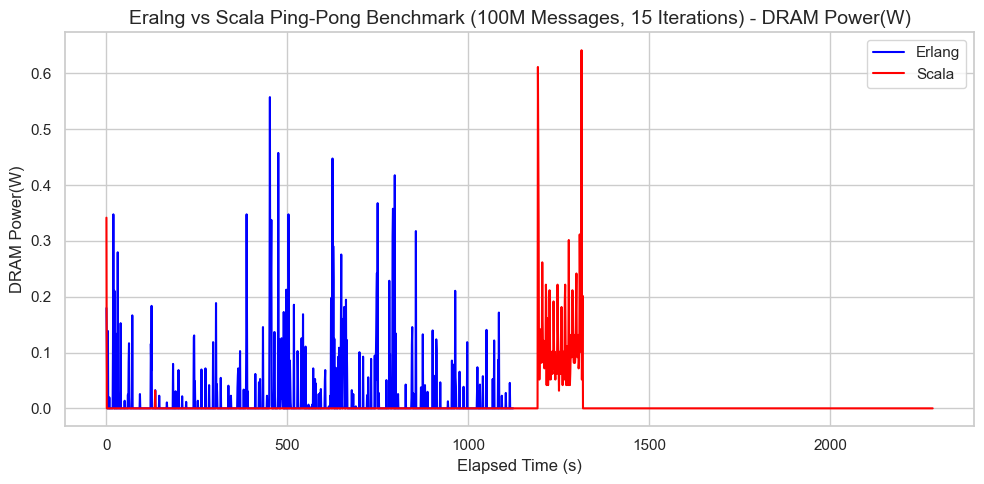

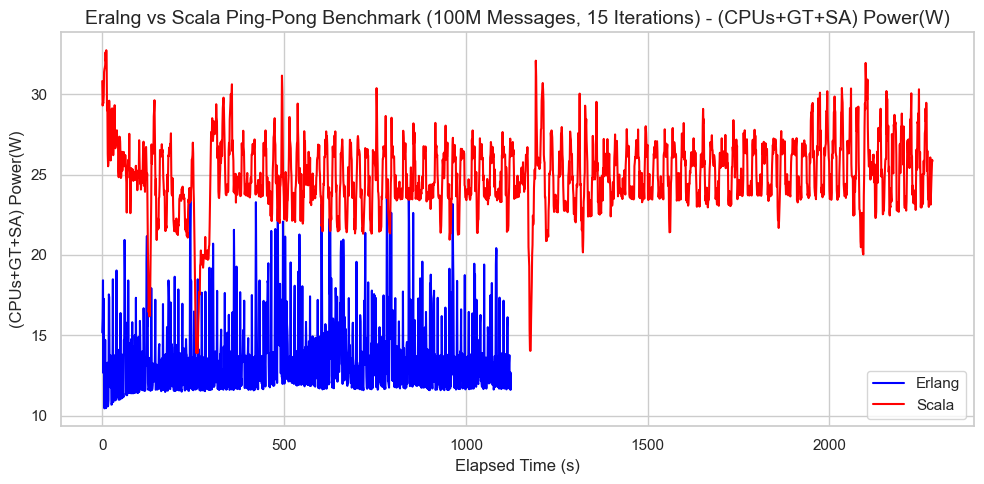

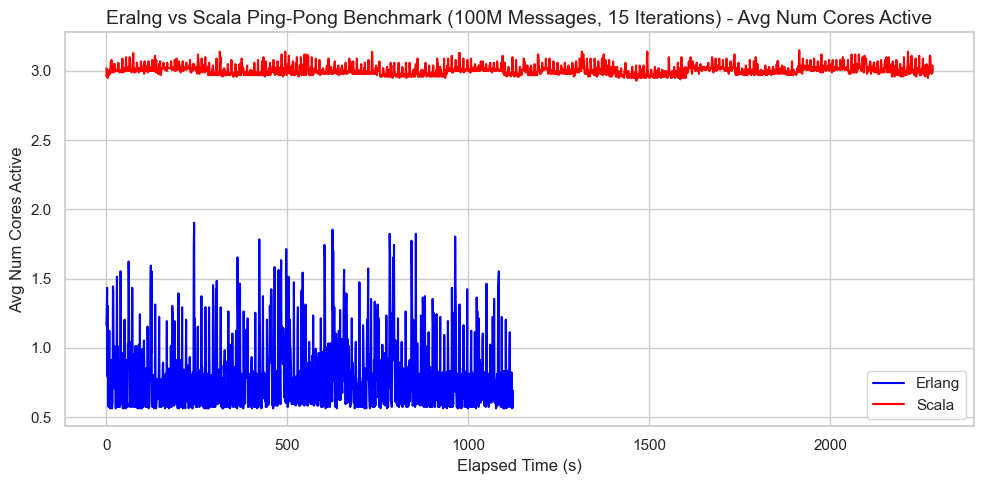

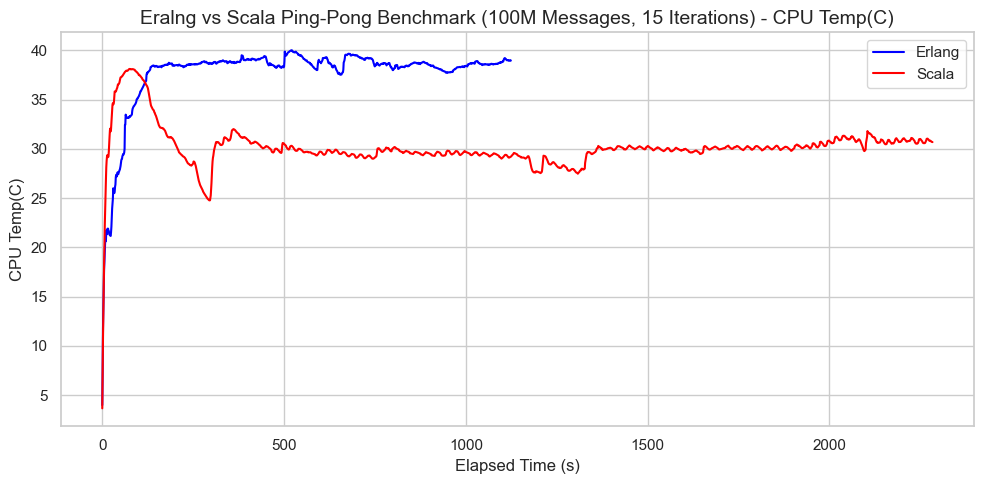

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        23.990389
GT Power(W)              -0.500668
DRAM Power(W)            -0.359359
(CPUs+GT+SA) Power(W)    24.885943
CPU Temp(C)              30.152827
Avg Num Cores Active      3.004488
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.243446
GT Power(W)              -0.010055
DRAM Power(W)            -0.082599
(CPUs+GT+SA) Power(W)    13.580043
CPU Temp(C)              37.669317
Avg Num Cores Active      0.797837
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 56851.35481525216 Joules
Erlang Benchmark: 15275.426962029984 Joules
